# Case de Análise de Dados no Pandas!

Iremos usar o banco de dados [Online Retail.xlsx](https://archive.ics.uci.edu/ml/datasets/Online+Retail), disponível no [Repositório de Dados para Machine Learning da UCI](https://archive.ics.uci.edu/ml/index.php). Para efeitos didáticos, eu fiz uma transformação no banco de dados para incluir a coluna `region`, que contém o nome do país assim como do continente.

![title](https://raw.githubusercontent.com/amauri-ti/labdata/04739413840b9e11d8acb3a1de37646648eee4d9/imgs/uci-logo.png)

### Importando as bibliotecas necessárias e o banco de dados

In [0]:

import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = spark.read.csv("/FileStore/tables/retail-2.csv", header=True, sep=';')
df = df.toPandas()

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom


In [0]:
display(dbutils.fs.ls('/FileStore/tables/'))

path,name,size,modificationTime
dbfs:/FileStore/tables/Companhia_MB-1.txt,Companhia_MB-1.txt,1710,1682425583000
dbfs:/FileStore/tables/Companhia_MB.txt,Companhia_MB.txt,1710,1682345736000
dbfs:/FileStore/tables/retail-1.csv,retail-1.csv,46123660,1682009478000
dbfs:/FileStore/tables/retail-2.csv,retail-2.csv,46123660,1682617786000
dbfs:/FileStore/tables/retail.csv,retail.csv,46123658,1682002987000


#### Significado das colunas:

* `invoice_no`: número do pedido
* `stock_code`: número único que caracteriza o item/produto (SKU)
* `description`: descrição/nome do produto
* `quantity`: quantidade do produto vendida
* `invoice_date`: data em que o pedido foi realizado
* `unit_price`: preço unitário
* `customer_id`: identificador único do cliente
* `region`: região de onde o cliente realizou a compra

# Operações básicas de dados no Pandas

## 1. Selecionando colunas

Existem 2 formas de selecionar colunas no Pandas: a primeira é usando o `parênteses` e a segunda usando o método `filter()`.

In [0]:
df[['stock_code', 'unit_price']]

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
df.filter(['stock_code', 'unit_price'])

,stock_code,unit_price
0,85123A,"2,55"
1,71053,"3,39"
2,84406B,"2,75"
3,84029G,"3,39"
4,84029E,"3,39"
...,...,...
541904,22613,"0,85"
541905,22899,"2,1"
541906,23254,"4,15"
541907,23255,"4,15"


In [0]:
df.filter(like='id')

,customer_id
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
541904,12680
541905,12680
541906,12680
541907,12680


In [0]:
toy_df = pd.DataFrame({'pedido_id': [1, 1, 2, 3, 3], 
                       'produto_id': [251, 985, 390, 204, 985], 
                       'descricao': ['carro', 'boneca', 'celular', 'caderno', 'boneca'], 
                       'data_compra': ['2020-03-01', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-03'], 
                       'data_entrega': ['2020-03-02', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-04'], 
                       'valor_item': [25000, 30, 2000, 15, 30], 
                       'quantidade': [1, 1, 1, 2, 3]})
toy_df

,pedido_id,produto_id,descricao,data_compra,data_entrega,valor_item,quantidade
0,1,251,carro,2020-03-01,2020-03-02,25000,1
1,1,985,boneca,2020-03-01,2020-03-02,30,1
2,2,390,celular,2020-03-02,2020-03-03,2000,1
3,3,204,caderno,2020-03-03,2020-03-04,15,2
4,3,985,boneca,2020-03-03,2020-03-04,30,3


In [0]:
toy_df.shape

Out[101]: (5, 7)

In [0]:
toy_df.filter(like='data')

,data_compra,data_entrega
0,2020-03-01,2020-03-02
1,2020-03-01,2020-03-02
2,2020-03-02,2020-03-03
3,2020-03-03,2020-03-04
4,2020-03-03,2020-03-04


In [0]:
toy_df.filter(like='id')

,pedido_id,produto_id,quantidade
0,1,251,1
1,1,985,1
2,2,390,1
3,3,204,2
4,3,985,3


## 2. Filtros

Também existem duas formas de realizar filtros no Pandas: uma com `parênteses` e outra com o método `query()`.

In [0]:
df[df['invoice_no'] == '536368']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom


In [0]:
df.query('invoice_no == "536368"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom


#### Filtrando com duas condições

Condição `and`

In [0]:
df[(df['invoice_no'] == '536368') & (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom


In [0]:
df.query('invoice_no == "536368" and stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom


Condição `or`

In [0]:
df[(df['invoice_no'] == '536368') | (df['stock_code'] == '22960')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,01/12/2010 09:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,08/12/2011 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,08/12/2011 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,08/12/2011 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,09/12/2011 10:03,"8,29",None,United Kingdom


In [0]:
df.query('invoice_no == "536368" or stock_code == "22960"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
21,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,"4,25",13047,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
24,536368,22914,BLUE COAT RACK PARIS FASHION,3,01/12/2010 08:34,"4,95",13047,United Kingdom
170,536385,22960,JAM MAKING SET WITH JARS,6,01/12/2010 09:56,"4,25",17420,United Kingdom
...,...,...,...,...,...,...,...,...
539091,581433,22960,JAM MAKING SET WITH JARS,6,08/12/2011 15:54,"4,25",14911,EIRE
539731,581439,22960,JAM MAKING SET WITH JARS,3,08/12/2011 16:30,"8,29",None,United Kingdom
539954,581451,22960,JAM MAKING SET WITH JARS,6,08/12/2011 17:57,"4,25",17144,United Kingdom
541049,581492,22960,JAM MAKING SET WITH JARS,2,09/12/2011 10:03,"8,29",None,United Kingdom


## 3. Criando novas colunas

Existem duas formas de criar colunas com o Pandas: uma com `parênteses` e outra usando o método `assign()`.

In [0]:
df['total_price'] = df['quantity'] + df['unit_price']

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.drop('total_price', axis=1, inplace=True)

In [0]:
df.assign(total_price = df['quantity'] + df['unit_price']).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom


O método `assign()` não modifica a tabela inplace. O que o torna uma boa opção para validar a nova coluna criada antes de efetivamente adicioná-la na tabela.

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom


Para salvar a coluna de fato, devemos atribuir a operação para uma tabela.

In [0]:
df = df.assign(total_price = df['quantity'] + df['unit_price'])

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom,"62,55"
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom,"82,75"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom,"63,39"


In [0]:
df.drop('total_price', axis=1, inplace=True)

## 4. Ordenando colunas

Aqui, existem apenas um método: `sort_values()`.

In [0]:
df.sort_values('invoice_date').head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
77641,542776,21485,RETROSPOT HEART HOT WATER BOTTLE,3,01/02/2011 08:23,"4,95",15240,United Kingdom
77640,542776,21218,RED SPOTTY BISCUIT TIN,6,01/02/2011 08:23,"3,75",15240,United Kingdom
77639,542776,17021,NAMASTE SWAGAT INCENSE,36,01/02/2011 08:23,"0,3",15240,United Kingdom
77638,542776,22083,PAPER CHAIN KIT RETROSPOT,12,01/02/2011 08:23,"2,95",15240,United Kingdom
77637,542776,22835,HOT WATER BOTTLE I AM SO POORLY,4,01/02/2011 08:23,"4,65",15240,United Kingdom


In [0]:
df.sort_values('invoice_date', ascending=False).head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
431672,573734,72818,check,-26,31/10/2011 17:19,0,None,United Kingdom
431671,573726,72817,check,-67,31/10/2011 17:18,0,None,United Kingdom
431670,573695,23397,FOOT STOOL HOME SWEET HOME,4,31/10/2011 17:13,"9,95",15023,United Kingdom
431669,573695,23543,WALL ART KEEP CALM,1,31/10/2011 17:13,"8,25",15023,United Kingdom
431668,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,31/10/2011 17:13,"9,95",15023,United Kingdom


## 5. Aggregações

No Pandas podemos criar agregações de duas formas: em uma coluna ou em grupos.

### Agregações em uma coluna

In [0]:
df['invoice_date'].min()

Out[121]: '01/02/2011 08:23'

In [0]:
df['invoice_date'].max()

Out[122]: '31/10/2011 17:19'

In [0]:
df.agg({'invoice_date': ['min', 'max']})

,invoice_date
min,01/02/2011 08:23
max,31/10/2011 17:19


### Agregações no método `groupby()`

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index()

,invoice_no,n
0,536365,7
1,536366,2
2,536367,12
3,536368,4
4,536369,1
...,...,...
25895,C581484,1
25896,C581490,2
25897,C581499,1
25898,C581568,1


## 6. Combinando as operações

Limpando os nossos dados. Pedidos com começam com a letra `C` foram cancelados, logo devem ser retirados da base de dados.
Também temos pedidos com quantidades negativas, que significa que ou foram cancelados ou estornados.

In [0]:
#df = (
#    df
#    .assign(start_with_c = lambda x: x['invoice_no'].str.startswith('C'))
#    .query('start_with_c == False')
#    .query('quantity >= 0')
#)

##### Realize uma 'query' que retorne os top 10 pedidos com mais itens.

In [0]:
df.groupby('invoice_no').agg(n=('stock_code', 'count')).reset_index().sort_values('n', ascending=False).head(10)

,invoice_no,n
18141,573585,1114
21897,581219,749
22032,581492,731
21645,580729,721
10713,558475,705
21164,579777,687
21895,581217,676
576,537434,675
21646,580730,662
881,538071,652


Traga a data em que o pedido foi realizado

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
)

,invoice_no,n,datetime
18141,573585,1114,31/10/2011 14:41
21897,581219,749,08/12/2011 09:28
22032,581492,731,09/12/2011 10:03
21645,580729,721,05/12/2011 17:24
10713,558475,705,29/06/2011 15:58
21164,579777,687,30/11/2011 15:13
21895,581217,676,08/12/2011 09:20
576,537434,675,06/12/2010 16:57
21646,580730,662,05/12/2011 17:28
881,538071,652,09/12/2010 14:09


Crie uma coluna apenas com a data --> valendo 1 ponto
### -> retornamos segunda

In [0]:
#import datetime as dt
from datetime import date

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(date = date.today())
    .assign(date2 = date.today())
    .assign(date3 = date(2023, 4, 24))
)

,invoice_no,n,datetime,date,date2,date3
18141,573585,1114,31/10/2011 14:41,2023-05-03,2023-05-03,2023-04-24
21897,581219,749,08/12/2011 09:28,2023-05-03,2023-05-03,2023-04-24
22032,581492,731,09/12/2011 10:03,2023-05-03,2023-05-03,2023-04-24
21645,580729,721,05/12/2011 17:24,2023-05-03,2023-05-03,2023-04-24
10713,558475,705,29/06/2011 15:58,2023-05-03,2023-05-03,2023-04-24
21164,579777,687,30/11/2011 15:13,2023-05-03,2023-05-03,2023-04-24
21895,581217,676,08/12/2011 09:20,2023-05-03,2023-05-03,2023-04-24
576,537434,675,06/12/2010 16:57,2023-05-03,2023-05-03,2023-04-24
21646,580730,662,05/12/2011 17:28,2023-05-03,2023-05-03,2023-04-24
881,538071,652,09/12/2010 14:09,2023-05-03,2023-05-03,2023-04-24


In [0]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,"2,55",17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,"3,39",17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,"2,75",17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,"3,39",17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,"3,39",17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,"0,85",12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,"2,1",12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,"4,15",12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,"4,15",12680,France


No pandas, assim como no SQL, não conseguimos referenciar uma coluna que acabou de ser criada. Para conseguirmos fazer isso, podemos usar funções lambda!

DESAFIO VALENDO 1 PONTO! CASA!

In [0]:
df = df.assign(Date = lambda x: pd.to_datetime(x['invoice_date']))

df.head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850,United Kingdom,15.30,2010-01-12 08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850,United Kingdom,22.00,2010-01-12 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,01/12/2010 08:26,7.65,17850,United Kingdom,15.30,2010-01-12 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,01/12/2010 08:26,4.25,17850,United Kingdom,25.50,2010-01-12 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6.0,01/12/2010 08:28,1.85,17850,United Kingdom,11.10,2010-01-12 08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,01/12/2010 08:28,1.85,17850,United Kingdom,11.10,2010-01-12 08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,01/12/2010 08:34,1.69,13047,United Kingdom,54.08,2010-01-12 08:34:00


In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         first_date = ('Date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
)

,invoice_no,n,first_date
18141,573585,1114,2011-10-31 14:41:00
21897,581219,749,2011-08-12 09:28:00
22032,581492,731,2011-09-12 10:03:00
21645,580729,721,2011-05-12 17:24:00
10713,558475,705,2011-06-29 15:58:00
21164,579777,687,2011-11-30 15:13:00
21895,581217,676,2011-08-12 09:20:00
576,537434,675,2010-06-12 16:57:00
21646,580730,662,2011-05-12 17:28:00
881,538071,652,2010-09-12 14:09:00


A coluna `datetime` não é do time datetime. Ela é do tipo `object`.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .dtypes
)

Out[131]: invoice_no    object
n              int64
datetime      object
dtype: object

Então, para resolvermos o problema temos que transformar o tipo da coluna para datetime e só depois conseguiremos performar a operação desejada.

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .dtypes
)

Out[132]: invoice_no            object
n                      int64
datetime      datetime64[ns]
dtype: object

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
)

,invoice_no,n,datetime,date
18141,573585,1114,2011-10-31 14:41:00,2011-10-31
21897,581219,749,2011-08-12 09:28:00,2011-08-12
22032,581492,731,2011-09-12 10:03:00,2011-09-12
21645,580729,721,2011-05-12 17:24:00,2011-05-12
10713,558475,705,2011-06-29 15:58:00,2011-06-29
21164,579777,687,2011-11-30 15:13:00,2011-11-30
21895,581217,676,2011-08-12 09:20:00,2011-08-12
576,537434,675,2010-06-12 16:57:00,2010-06-12
21646,580730,662,2011-05-12 17:28:00,2011-05-12
881,538071,652,2010-09-12 14:09:00,2010-09-12


Agora, vamos dropar a coluna `datetime`. 

Jeito 1:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .drop('datetime', axis=1)
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-08-12
22032,581492,731,2011-09-12
21645,580729,721,2011-05-12
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-08-12
576,537434,675,2010-06-12
21646,580730,662,2011-05-12
881,538071,652,2010-09-12


Jeito 2:

In [0]:
(
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-08-12
22032,581492,731,2011-09-12
21645,580729,721,2011-05-12
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-08-12
576,537434,675,2010-06-12
21646,580730,662,2011-05-12
881,538071,652,2010-09-12


In [0]:
top_10_invoice_df = (
    df
    .groupby('invoice_no')
    .agg(n        = ('stock_code', 'count'), 
         datetime = ('invoice_date', 'first'))
    .reset_index()
    .sort_values('n', ascending=False)
    .head(10)
    .assign(datetime = lambda x: pd.to_datetime(x['datetime']))
    .assign(date = lambda x: x['datetime'].dt.date)
    .filter(['invoice_no', 'n', 'date'])
)

In [0]:
top_10_invoice_df

,invoice_no,n,date
18141,573585,1114,2011-10-31
21897,581219,749,2011-08-12
22032,581492,731,2011-09-12
21645,580729,721,2011-05-12
10713,558475,705,2011-06-29
21164,579777,687,2011-11-30
21895,581217,676,2011-08-12
576,537434,675,2010-06-12
21646,580730,662,2011-05-12
881,538071,652,2010-09-12


### Vamos fazer um gráfico de barras

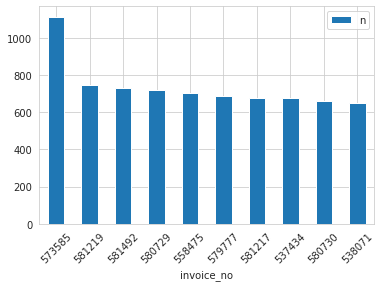

In [0]:
top_10_invoice_df.plot(kind='bar', x='invoice_no', y='n', rot=45);

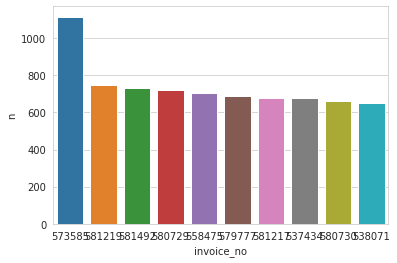

In [0]:
import seaborn as sns


sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n');

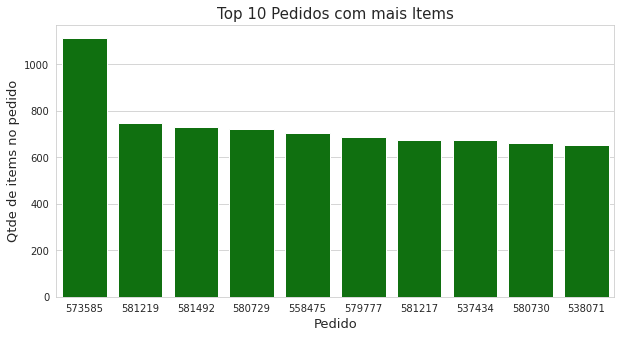

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

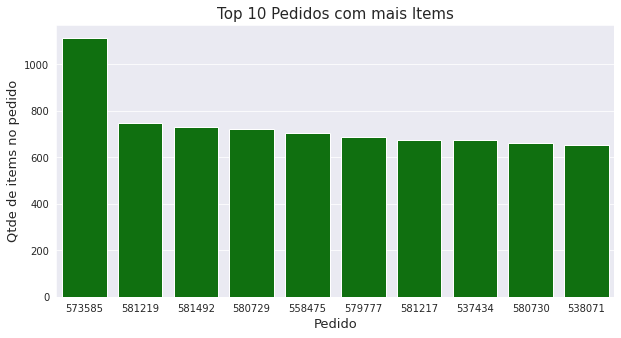

In [0]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(data=top_10_invoice_df, x='invoice_no', y='n', ax=ax, color='green');
ax.set_ylabel('Qtde de items no pedido', fontsize=13);
ax.set_xlabel('Pedido', fontsize=13);
ax.set_title('Top 10 Pedidos com mais Items', fontsize=15);

### Vamos fazer um boxplot do preço total do pedido

valendo 0,5!

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   invoice_no    541909 non-null  object
 1   stock_code    541909 non-null  object
 2   description   540455 non-null  object
 3   quantity      541909 non-null  object
 4   invoice_date  541909 non-null  object
 5   unit_price    541909 non-null  object
 6   customer_id   406829 non-null  object
 7   region        541909 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [0]:
df['quantity'] = df['quantity'].astype(float)

In [0]:
df['unit_price'] = df['unit_price'].str.replace(',','.')

In [0]:
df['unit_price'] = df['unit_price'].astype(float)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  float64
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  object 
 7   region        541909 non-null  object 
dtypes: float64(2), object(6)
memory usage: 33.1+ MB


In [0]:
df['total_price'] = df['quantity'] * df['unit_price']
df['total_price']

Out[147]: 0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: total_price, Length: 541909, dtype: float64

In [0]:
df_pedido_agrupado = df[['invoice_no', 'total_price']].groupby('invoice_no').sum('total_price').reset_index()
df_pedido_agrupado

,invoice_no,total_price
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
25895,C581484,-168469.60
25896,C581490,-32.53
25897,C581499,-224.69
25898,C581568,-54.75


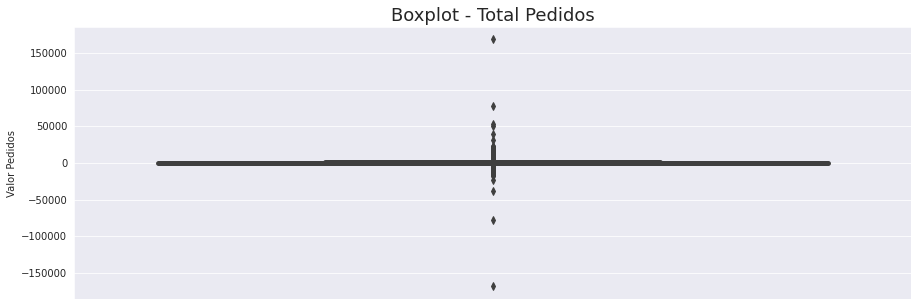

In [0]:
plt.figure(figsize=(15,5))
gf_totalpedidos = sns.boxplot(y=df_pedido_agrupado['total_price'], linewidth=5)
plt.title("Boxplot - Total Pedidos", loc="center", fontsize=18)
plt.ylabel("Valor Pedidos")
plt.show(gf_totalpedidos)


In [0]:
revenue_by_invoice_df = (
    df
    .assign(preco = lambda x: x['quantity'] * x['unit_price'])
    .groupby('invoice_no')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
)
revenue_by_invoice_df

,invoice_no,revenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
25895,C581484,-168469.60
25896,C581490,-32.53
25897,C581499,-224.69
25898,C581568,-54.75


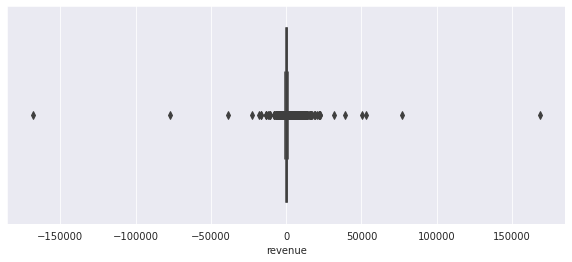

In [0]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(data=revenue_by_invoice_df, x='revenue', ax=ax);

Vamos fazer o mesmo boxplot, mas para cada mês

valendo 0,5!

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850,United Kingdom,15.30,2010-01-12 08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850,United Kingdom,22.00,2010-01-12 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  float64       
 4   invoice_date  541909 non-null  object        
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  object        
 7   region        541909 non-null  object        
 8   total_price   541909 non-null  float64       
 9   Date          541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 41.3+ MB


In [0]:
df['Mes'] = df['Date'].dt.month

In [0]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total_price,Date,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/2010 08:26,2.55,17850,United Kingdom,15.30,2010-01-12 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/2010 08:26,2.75,17850,United Kingdom,22.00,2010-01-12 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/2010 08:26,3.39,17850,United Kingdom,20.34,2010-01-12 08:26:00,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  float64       
 4   invoice_date  541909 non-null  object        
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  object        
 7   region        541909 non-null  object        
 8   total_price   541909 non-null  float64       
 9   Date          541909 non-null  datetime64[ns]
 10  Mes           541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 45.5+ MB


In [0]:
df_agrupado_mes = df.groupby('Mes').sum('total_price').filter(['Mes', 'total_price']).reset_index()
df_agrupado_mes

,Mes,total_price
0,1,666383.670
1,2,588718.820
2,3,757679.970
3,4,660149.571
4,5,765153.270
5,6,799112.520
6,7,888950.281
7,8,759822.560
8,9,1045087.582
9,10,989257.070


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  float64       
 4   invoice_date  541909 non-null  object        
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  object        
 7   region        541909 non-null  object        
 8   total_price   541909 non-null  float64       
 9   Date          541909 non-null  datetime64[ns]
 10  Mes           541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 45.5+ MB


In [0]:
df_agrupado_mes2 = (
                    df[['invoice_no', 'total_price', 'Date']]
                    .groupby('invoice_no')
                    .agg(soma=('total_price', 'sum'),
                         Data=('Date', 'first'))
                    .reset_index())
df_agrupado_mes2

,invoice_no,soma,Data
0,536365,139.12,2010-01-12 08:26:00
1,536366,22.20,2010-01-12 08:28:00
2,536367,278.73,2010-01-12 08:34:00
3,536368,70.05,2010-01-12 08:34:00
4,536369,17.85,2010-01-12 08:35:00
...,...,...,...
25895,C581484,-168469.60,2011-09-12 09:27:00
25896,C581490,-32.53,2011-09-12 09:57:00
25897,C581499,-224.69,2011-09-12 10:28:00
25898,C581568,-54.75,2011-09-12 11:57:00


In [0]:
df_agrupado_mes2['Mes']= df_agrupado_mes2['Data'].dt.month
df_agrupado_mes2

,invoice_no,soma,Data,Mes
0,536365,139.12,2010-01-12 08:26:00,1
1,536366,22.20,2010-01-12 08:28:00,1
2,536367,278.73,2010-01-12 08:34:00,1
3,536368,70.05,2010-01-12 08:34:00,1
4,536369,17.85,2010-01-12 08:35:00,1
...,...,...,...,...
25895,C581484,-168469.60,2011-09-12 09:27:00,9
25896,C581490,-32.53,2011-09-12 09:57:00,9
25897,C581499,-224.69,2011-09-12 10:28:00,9
25898,C581568,-54.75,2011-09-12 11:57:00,9


In [0]:
df_agrupado_mes2 = df_agrupado_mes2.drop('Data', axis=1)
df_agrupado_mes2

,invoice_no,soma,Mes
0,536365,139.12,1
1,536366,22.20,1
2,536367,278.73,1
3,536368,70.05,1
4,536369,17.85,1
...,...,...,...
25895,C581484,-168469.60,9
25896,C581490,-32.53,9
25897,C581499,-224.69,9
25898,C581568,-54.75,9


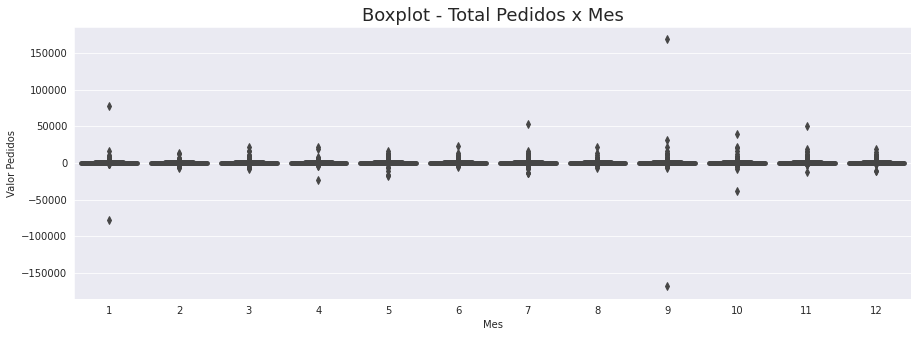

In [0]:
plt.figure(figsize=(15,5))
gf_total_mes = sns.boxplot(data=df_agrupado_mes2, x='Mes', y='soma', linewidth=5)
plt.title("Boxplot - Total Pedidos x Mes", loc="center", fontsize=18)
plt.ylabel("Valor Pedidos")
plt.show(gf_total_mes)

# Vamos calcular a receita por país

In [0]:
df.head()

In [0]:
df[['country', 'continent']] = df['region'].str.split(n=1, expand=True)

In [0]:
df.head()

### Podemos criar uma função

In [0]:
def separate_col(data, col, into):
    df = data.copy()
    df[into] = df[col].str.split(', ', expand=True)
    return df

In [0]:
df.head()

In [0]:
df = df.drop(['country', 'continent'], axis=1)

In [0]:
df.head()

In [0]:
#separate_col(df, col='region', into=['country', 'continent'])

In [0]:
#df.pipe(separate_col, col='region', into=['country', 'continent'])

Vamos generalizar a nossa função! Vamos incluir o argumento `sep` e `keep`.

In [0]:
def separate_col(data, col, into, sep=', ', keep=True):
    df = data.copy()
    df[into] = df[col].str.split(sep, expand=True)
    
    if keep:
        return df
    else:
        df = df.drop(col, axis=1)
        return df

In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'])

In [0]:
df.pipe(separate_col, col='region', into=['country', 'continent'], keep=False)

### Retorne os 10 países com as maiores receitas.

In [0]:
top10_revenue_by_country_df = (
    df
    .pipe(separate_col, col='region', into=['country', 'continent'], keep=False)
    .assign(total_price = lambda x: x['quantity'] * x['unit_price'])
    .groupby('country')
    .agg(revenue = ('total_price', 'sum'))
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10)
)

In [0]:
top10_revenue_by_country_df

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=top10_revenue_by_country_df, y='country', x='revenue', ax=ax, color='green');
ax.set_ylabel('Country', fontsize=13);
ax.set_xlabel('Revenu', fontsize=13);
ax.set_title('Revenue by Country', fontsize=15);

### Vez de vocês! Façam o mesmo, mas para os continentes!

### Vamos calcular, para cada cliente, o seu RFV

In [0]:
df.head()

In [0]:
from datetime import datetime, date

rfv_df = (
    df
    .assign(total_price=df['quantity'] + df['unit_price'])
    .groupby(['customer_id'])
    .agg(revenue   = ('total_price', 'sum'), 
         frequency = ('invoice_no', 'count'), 
         last_shop = ('invoice_date', 'max'))
    .reset_index()
    .assign(last_shop = lambda x: pd.to_datetime(x['last_shop'], infer_datetime_format=True))
    .assign(ref_date = datetime.strptime('2012-01-01', '%Y-%m-%d'))
    .assign(recency = lambda x: (x['ref_date'] - x['last_shop']).dt.days)
    .filter(['ref_date', 'customer_id', 'revenue', 'frequency', 'recency'])
)

In [0]:
rfv_df